[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (11052506, 18)
Columns: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
Class distribution:
 label
0    2163851
1     873071
3     428323
2      31574
Name: count, dtype: int64


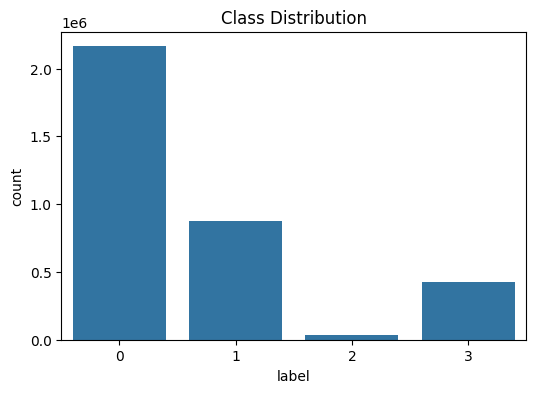

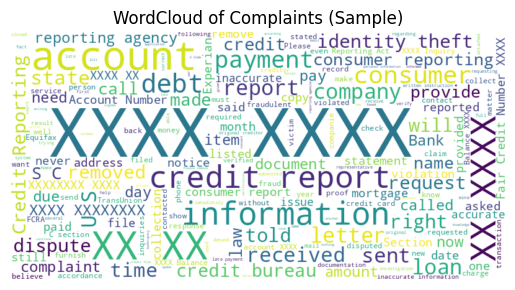

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.7260754056542802
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82    432770
           1       0.87      0.34      0.49    174614
           2       0.64      0.10      0.17      6315
           3       0.92      0.29      0.44     85665

    accuracy                           0.73    699364
   macro avg       0.78      0.43      0.48    699364
weighted avg       0.77      0.73      0.68    699364



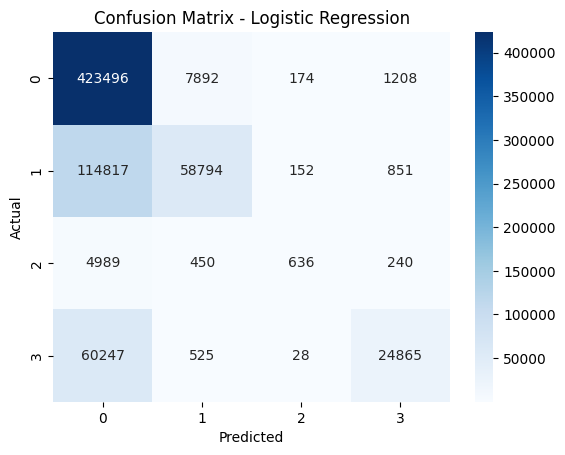


Naive Bayes Results:
Accuracy: 0.7137542109688231
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81    432770
           1       0.86      0.30      0.44    174614
           2       0.43      0.08      0.13      6315
           3       0.79      0.30      0.43     85665

    accuracy                           0.71    699364
   macro avg       0.70      0.41      0.45    699364
weighted avg       0.75      0.71      0.67    699364



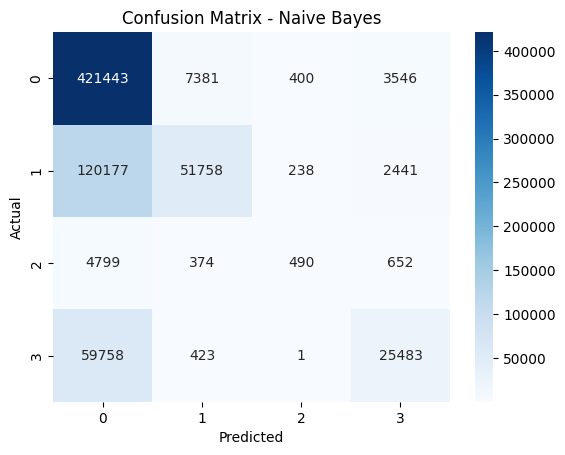


Random Forest Results:
Accuracy: 0.7093502096190253
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81    432770
           1       0.92      0.26      0.41    174614
           2       0.00      0.00      0.00      6315
           3       0.94      0.24      0.39     85665

    accuracy                           0.71    699364
   macro avg       0.63      0.37      0.40    699364
weighted avg       0.77      0.71      0.65    699364



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


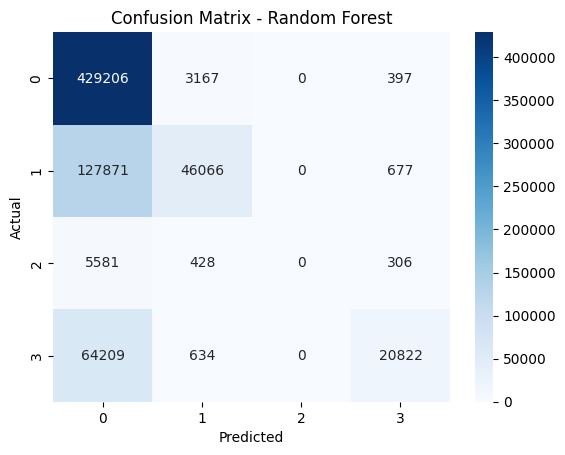

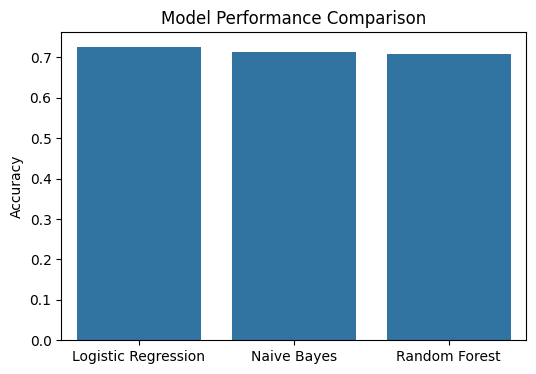

Best Model: Logistic Regression with Accuracy: 0.7260754056542802

Sample Predictions:
Text: I am being harassed by debt collectors every day!
Predicted Category: Debt collection

Text: My mortgage application was rejected unfairly.
Predicted Category: Mortgage

Text: Errors in my credit report are affecting my score.
Predicted Category: Credit reporting, credit repair services, or other personal consumer reports



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import joblib


nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


df = pd.read_csv("/content/drive/MyDrive/complaints.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns)


df.columns = df.columns.str.strip()


category_map = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}

df = df[df['Product'].isin(category_map.keys())]
df['label'] = df['Product'].map(category_map)

print("Class distribution:\n", df['label'].value_counts())


plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()


sample_text_data = " ".join(df['Consumer complaint narrative'].dropna().sample(
    min(1000, len(df)), random_state=42).values)

wc = WordCloud(width=800, height=400, background_color="white").generate(sample_text_data)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Complaints (Sample)")
plt.show()



stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z]", " ", text)
        words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
        return " ".join(words)
    return ""

df["clean_text"] = df["Consumer complaint narrative"].apply(preprocess)



tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs=1,random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.show()

best_model_name = max(results, key=results.get)
print("Best Model:", best_model_name, "with Accuracy:", results[best_model_name])



best_model = models[best_model_name]
joblib.dump(best_model, "best_text_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


sample_texts = [
    "I am being harassed by debt collectors every day!",
    "My mortgage application was rejected unfairly.",
    "Errors in my credit report are affecting my score."
]

sample_clean = [preprocess(t) for t in sample_texts]
sample_features = tfidf.transform(sample_clean)
predictions = best_model.predict(sample_features)

print("\nSample Predictions:")
for text, pred in zip(sample_texts, predictions):
    label_name = [k for k, v in category_map.items() if v == pred][0]
    print(f"Text: {text}\nPredicted Category: {label_name}\n")
